# <font color='Red'>Data Mining Group Assignment</font>

## <font color= 'Green'>Submitted by Ashwin Sarda,Mangesh Ingale, Arpit Mathur,Pritam Pati</font>

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [173]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [174]:
Rows, Columns=df.shape
print("Dataset has {} no of Records and {} No of Variables".format(Rows, Columns))

Dataset has 3000 no of Records and 10 No of Variables


In [175]:
#Dupliacte check.
df.duplicated().sum()

139

In [176]:
dup=df.duplicated()
df[dup]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [177]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [179]:
#for i in ins_df.columns:#looping through all of the columns or variables
#    if ins_df[i].dtype == 'object': #checking if the data type of the variable is 'object'
#        ins_df[i] = pd.Categorical(ins_df[i]).codes #converting the identified variable into Categorical and extracting the ranks

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [181]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [182]:
df = df[df['Duration'] != 0]

In [183]:
df = df[df['Duration'] != -1]

In [184]:
df.describe().T     #Describe.

,count,mean,std,min,25%,50%,75%,max
Age,2997.0,38.092426,10.464438,8.0,32.0,36.00,42.00,84.00
Commision,2997.0,14.525048,25.484357,0.0,0.0,4.63,17.23,210.21
Duration,2997.0,70.071738,134.101925,1.0,11.0,27.00,63.00,4580.00
Sales,2997.0,60.262673,70.747145,0.0,20.0,33.00,69.00,539.00


In [185]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2997,NaN,NaN,NaN,38.0924,10.4644,8,32,36,42,84
Agency_Code,2997,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2997,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2997,2,No,2073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2997,NaN,NaN,NaN,14.525,25.4844,0,0,4.63,17.23,210.21
Channel,2997,2,Online,2951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2997,NaN,NaN,NaN,70.0717,134.102,1,11,27,63,4580
Sales,2997,NaN,NaN,NaN,60.2627,70.7471,0,20,33,69,539
Product Name,2997,5,Customised Plan,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2997,3,ASIA,2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Histogram and Distplots for all four numeric variables.

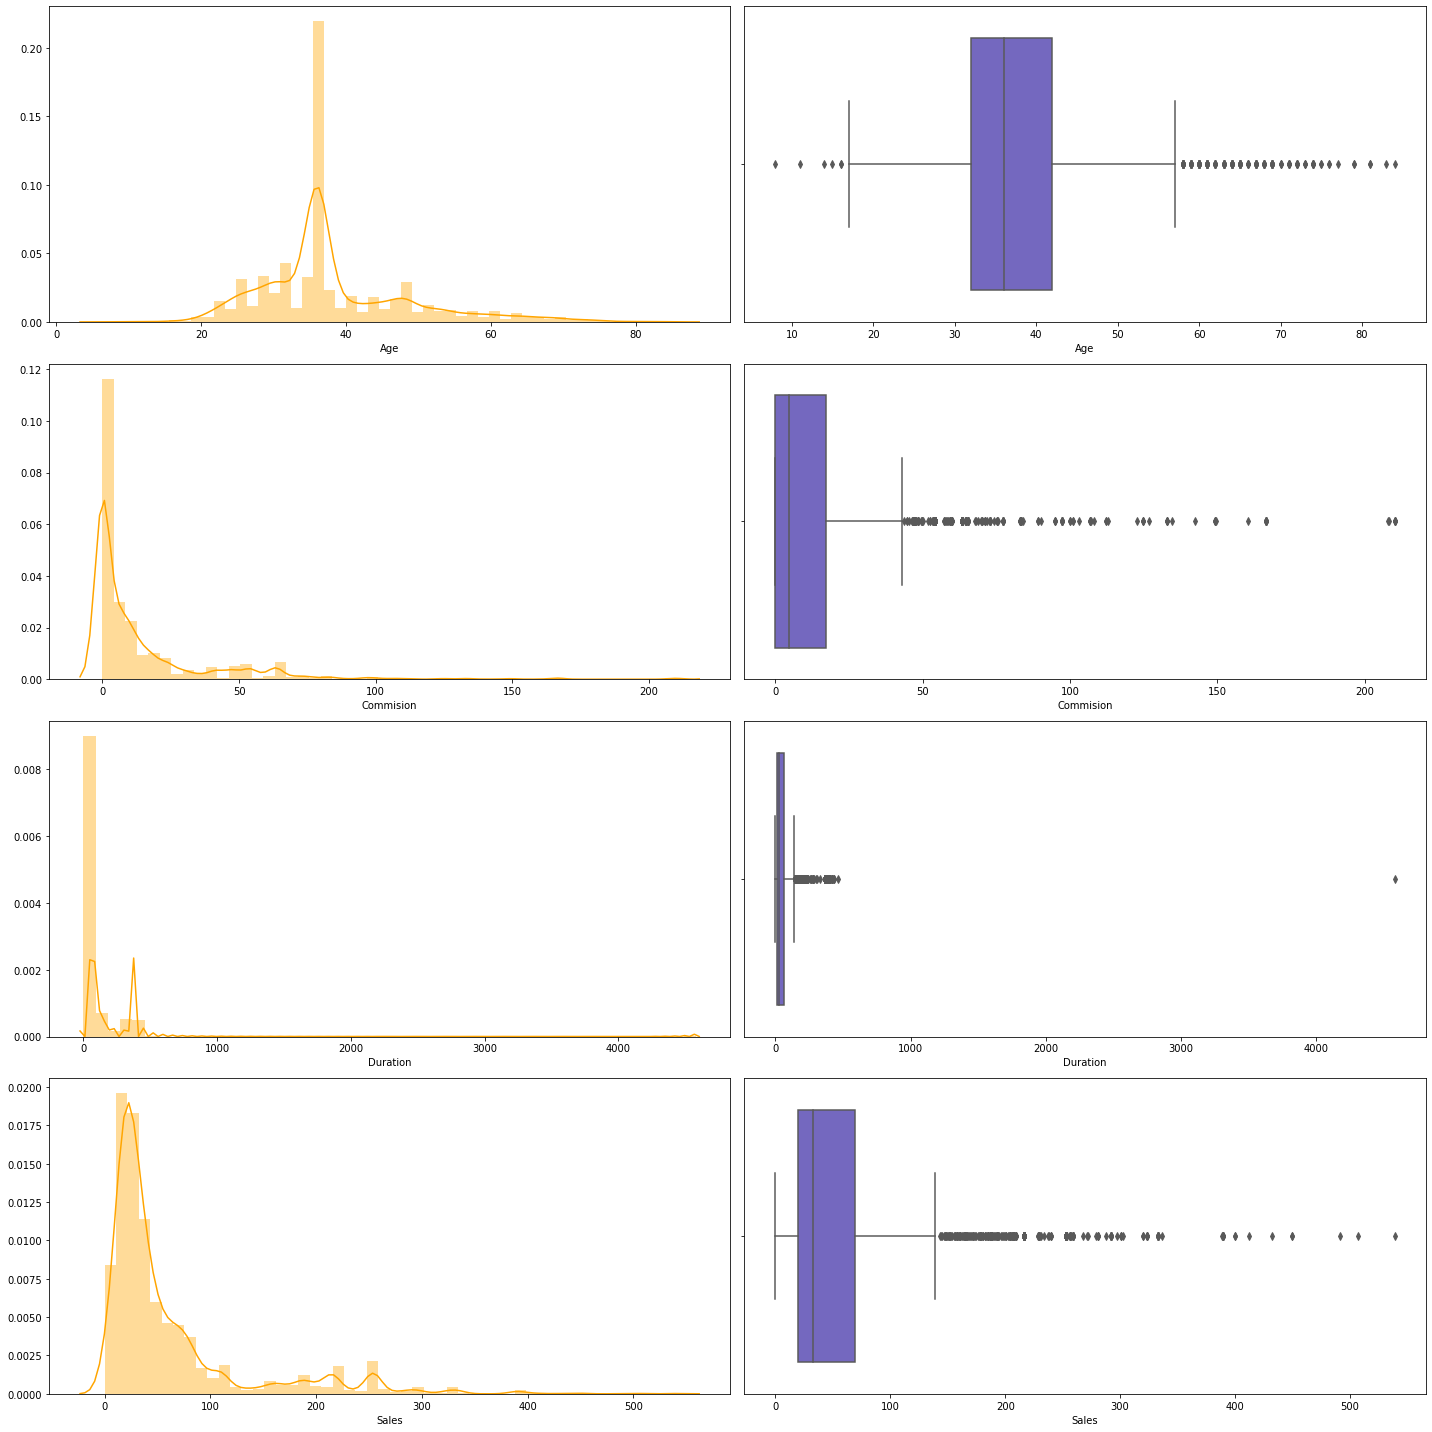

In [186]:
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(20,20))
#axes.tick_params(labelsize=15)
sns.distplot(df['Age'],color='Orange',ax=axes[0][0])
sns.boxplot(x='Age',color='Slateblue', data=df,ax=axes[0][1])
sns.distplot(df['Commision'],color='Orange',ax=axes[1][0])
sns.boxplot(x='Commision',color='Slateblue', data=df,ax=axes[1][1])
sns.distplot(df['Duration'],color='Orange',ax=axes[2][0])
sns.boxplot(x='Duration',color='Slateblue', data=df,ax=axes[2][1])
sns.distplot(df['Sales'],color='Orange',ax=axes[3][0])
sns.boxplot(x='Sales',color='Slateblue', data=df,ax=axes[3][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

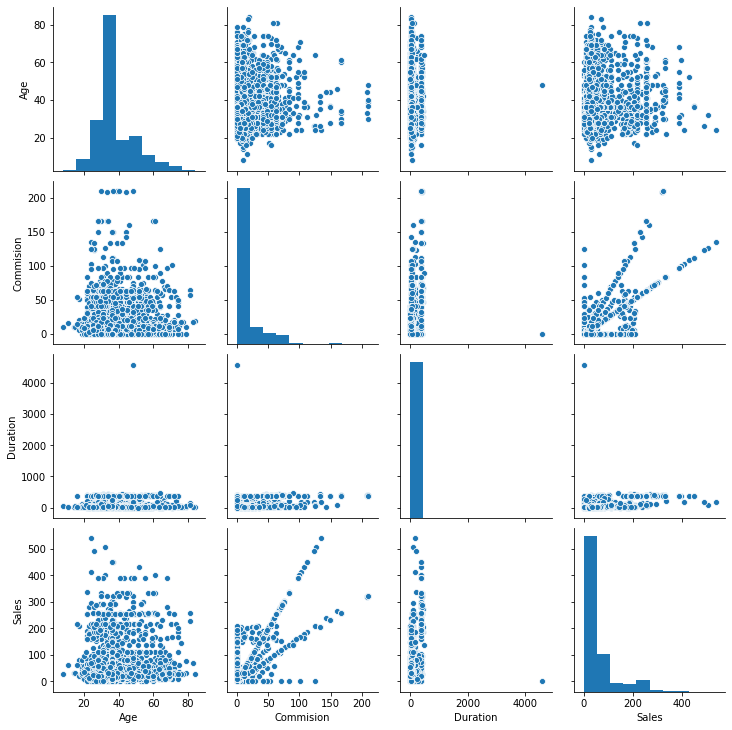

In [187]:
sns.pairplot(df[['Age', 'Commision', 'Duration', 'Sales']])    #Pairplot for all 4 numeric variables.
plt.show()

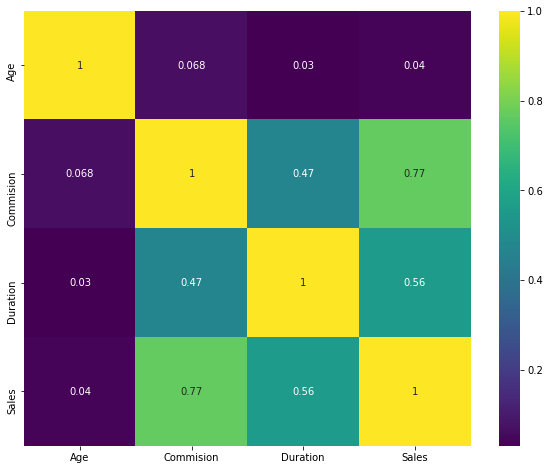

In [188]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age', 'Commision', 'Duration', 'Sales']].corr(), cmap='viridis',mask=None,annot=True)
plt.show()

### count plot, box plot and swarmplot for all categorical variable.

#### Agency code variable

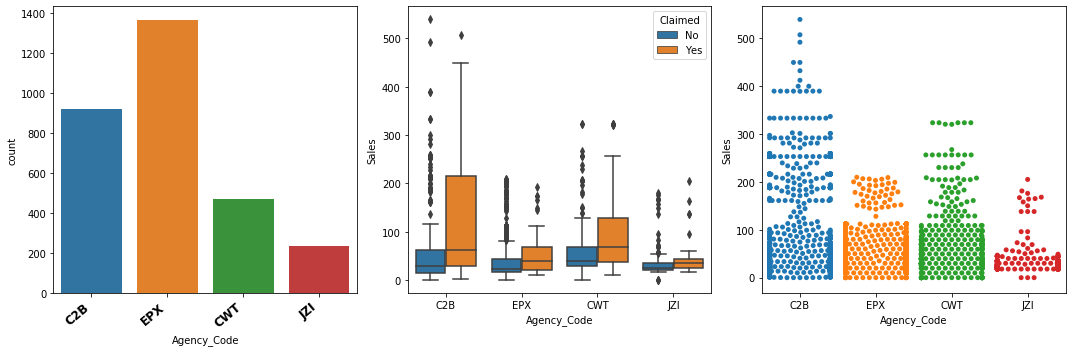

In [189]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
ax=sns.countplot(data = df, x = 'Agency_Code',ax=axes[0])
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed',ax=axes[1])
sns.swarmplot(data = df, x='Agency_Code',y='Sales', ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=12,ha="right",fontweight='bold')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Type variable

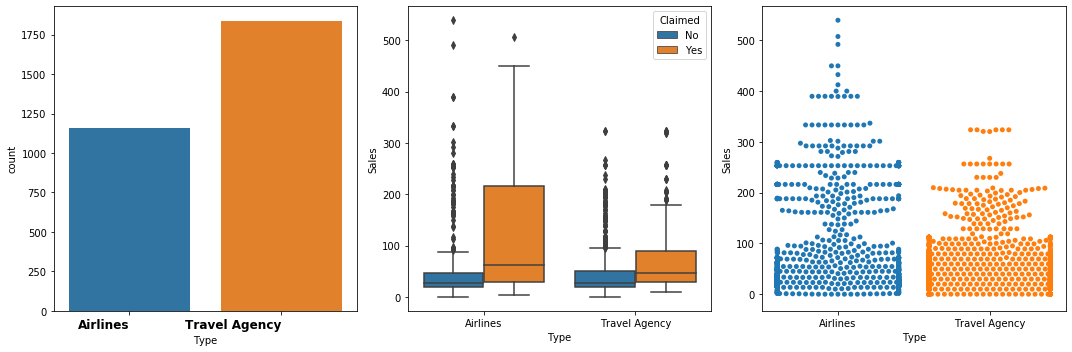

In [190]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
ax=sns.countplot(data = df, x = 'Type',ax=axes[0])
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed',ax=axes[1])
sns.swarmplot(data = df, x='Type',y='Sales', ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,ha="right",fontweight='bold')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Channel variable

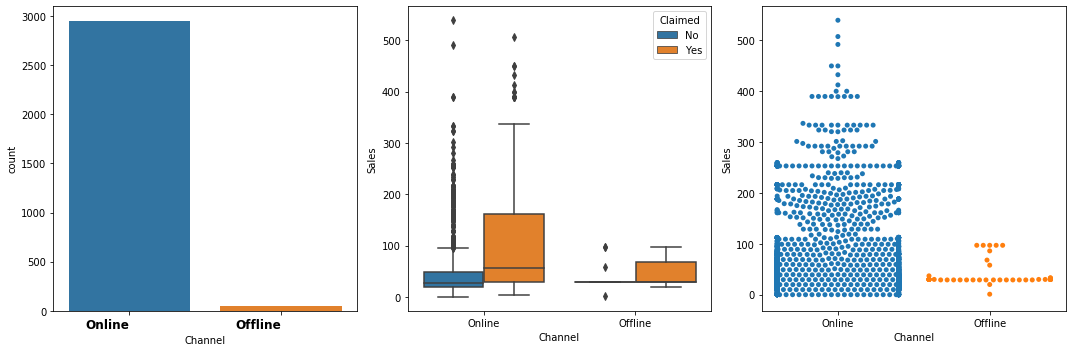

In [191]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
ax=sns.countplot(data = df, x = 'Channel',ax=axes[0])
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed',ax=axes[1])
sns.swarmplot(data = df, x='Channel',y='Sales', ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,ha="right",fontweight='bold')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Product Name variable

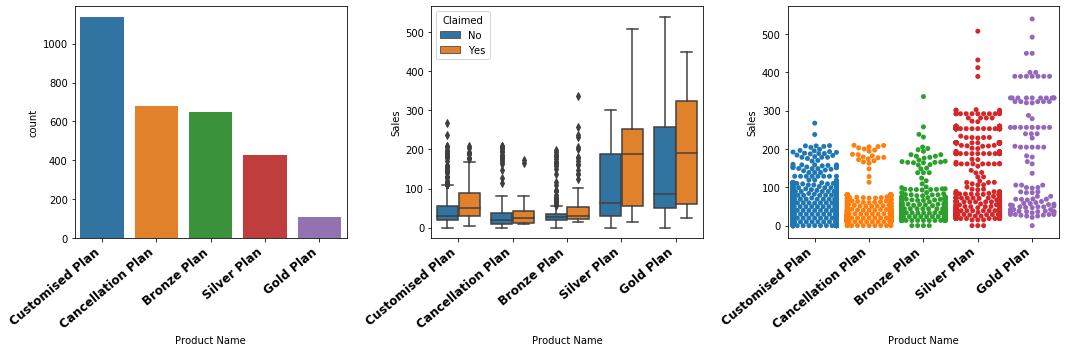

In [192]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
ax=sns.countplot(data = df, x = 'Product Name',ax=axes[0])
ax1=sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed',ax=axes[1])
ax2=sns.swarmplot(data = df, x='Product Name',y='Sales', ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=12,ha="right",fontweight='bold')
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=12,ha="right",fontweight='bold')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=12,ha="right",fontweight='bold')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Destination variable

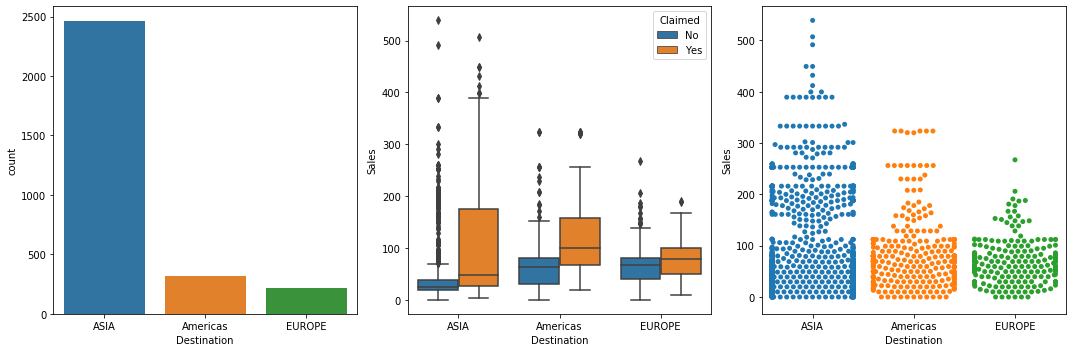

In [193]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
sns.countplot(data = df, x = 'Destination',ax=axes[0])
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed',ax=axes[1])
sns.swarmplot(data = df, x='Destination',y='Sales', ax=axes[2])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Removing target variable claimed and splittig data into train and test.

In [194]:
X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")

In [195]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,6.30,Online,53,18.00,Bronze Plan,ASIA


In [196]:
X = pd.get_dummies(X, drop_first = False )

In [197]:
list(X.columns)

['Age',
 'Commision',
 'Duration',
 'Sales',
 'Agency_Code_C2B',
 'Agency_Code_CWT',
 'Agency_Code_EPX',
 'Agency_Code_JZI',
 'Type_Airlines',
 'Type_Travel Agency',
 'Channel_Offline',
 'Channel_Online',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Customised Plan',
 'Product Name_Gold Plan',
 'Product Name_Silver Plan',
 'Destination_ASIA',
 'Destination_Americas',
 'Destination_EUROPE']

In [198]:
X.dtypes

Age                                 int64
Commision                         float64
Duration                            int64
Sales                             float64
Agency_Code_C2B                     uint8
Agency_Code_CWT                     uint8
Agency_Code_EPX                     uint8
Agency_Code_JZI                     uint8
Type_Airlines                       uint8
Type_Travel Agency                  uint8
Channel_Offline                     uint8
Channel_Online                      uint8
Product Name_Bronze Plan            uint8
Product Name_Cancellation Plan      uint8
Product Name_Customised Plan        uint8
Product Name_Gold Plan              uint8
Product Name_Silver Plan            uint8
Destination_ASIA                    uint8
Destination_Americas                uint8
Destination_EUROPE                  uint8
dtype: object

In [199]:
Y.replace(('Yes', 'No'), (1, 0), inplace=True) 

In [200]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int64

In [201]:
X.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,36,0.00,34,20.00,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,39,5.94,3,9.90,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,36,0.00,4,26.00,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
4,33,6.30,53,18.00,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0


In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

# <font color='Blue'> CART Model </font>

In [203]:
from sklearn import tree

In [204]:
dt_model = tree.DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [205]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [206]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.265262
Agency_Code_C2B                   0.206169
Sales                             0.199446
Age                               0.164364
Commision                         0.080061
Product Name_Silver Plan          0.015035
Product Name_Bronze Plan          0.014252
Product Name_Cancellation Plan    0.009637
Destination_EUROPE                0.008772
Product Name_Customised Plan      0.007875
Destination_Americas              0.005989
Destination_ASIA                  0.005573
Product Name_Gold Plan            0.004889
Agency_Code_CWT                   0.003688
Type_Airlines                     0.002294
Channel_Offline                   0.002024
Agency_Code_JZI                   0.001711
Agency_Code_EPX                   0.001508
Channel_Online                    0.001452
Type_Travel Agency                0.000000
dtype: float64

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6,7, 8, 9, 10],
    'min_samples_leaf': [10,15, 20, 25],
    'min_samples_split': [45, 60, 75, 90]
}

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5)

In [208]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 15, 20, 25],
  

In [209]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 45}

In [210]:
dt_model.score(X_train,Y_train)

0.9952312827849309

In [211]:
dt_model.score(X_test,Y_test)

0.6944444444444444

# Pruning/Regularizing the Tree

In [212]:
best_model_cart = grid_search.best_estimator_

In [213]:
Y_train_predict_class_cart = best_model_cart.predict(X_train)
Y_test_predict_class_cart = best_model_cart.predict(X_test)

In [214]:
Y_train_predict_prob_cart = best_model_cart.predict_proba(X_train)
Y_test_predict_prob_cart = best_model_cart.predict_proba(X_test)

# Model Evaluation of the CART - Train and Test Sets

## TRAIN

In [215]:
from sklearn import metrics

In [216]:
cart_conf_train = metrics.confusion_matrix(Y_train,Y_train_predict_class_cart)
print(cart_conf_train)

[[1285  165]
 [ 248  399]]


In [217]:
tn, fp, fn, tp =cart_conf_train.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1285 
False Positives: 165 
False Negatives: 248 
True Positives: 399


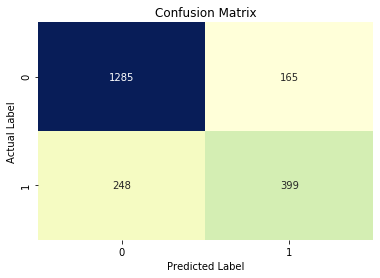

In [218]:
sns.heatmap(cart_conf_train,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [219]:
cart_metric=metrics.classification_report(Y_train,Y_train_predict_class_cart)
print(cart_metric)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1450
           1       0.71      0.62      0.66       647

    accuracy                           0.80      2097
   macro avg       0.77      0.75      0.76      2097
weighted avg       0.80      0.80      0.80      2097



Text(0.5, 1.0, 'Precision-Recall curve for CART model: AP={0:0.2f}')

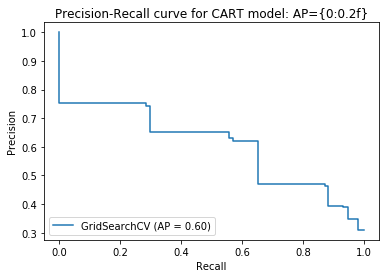

In [220]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(grid_search, X_test, Y_test)
disp.ax_.set_title('Precision-Recall curve for CART model: '
                   'AP={0:0.2f}')

## TEST

In [221]:
cart_conf_test=metrics.confusion_matrix(Y_test,Y_test_predict_class_cart)
print(cart_conf_test,'\n')
tn, fp, fn, tp = cart_conf_test.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

[[541  82]
 [123 154]] 

True Negative: 541 
False Positives: 82 
False Negatives: 123 
True Positives: 154


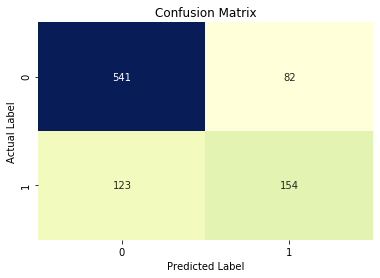

In [222]:
sns.heatmap(cart_conf_test,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [223]:
print(metrics.classification_report(Y_test,Y_test_predict_class_cart))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       623
           1       0.65      0.56      0.60       277

    accuracy                           0.77       900
   macro avg       0.73      0.71      0.72       900
weighted avg       0.76      0.77      0.77       900



# ROC CURVE & AUC

# TRAIN

AUC: 0.830


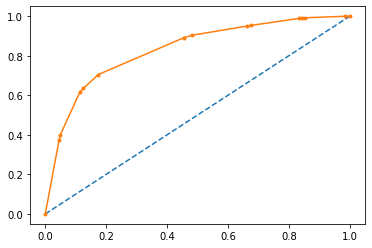

In [224]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_cart_train = metrics.roc_auc_score(Y_train,Y_train_predict_prob_cart[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_cart_train)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_cart_train, tpr_cart_train, thresholds_cart_train = metrics.roc_curve(Y_train,Y_train_predict_prob_cart[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_cart_train, tpr_cart_train, marker='.')
# show the plot
plt.show()

# TEST

AUC: 0.805


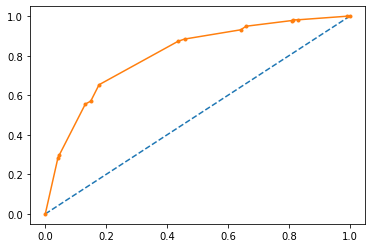

In [225]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_cart_test = metrics.roc_auc_score(Y_test,Y_test_predict_prob_cart[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_cart_test)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_cart_test, tpr_cart_test, thresholds_cart_test = metrics.roc_curve(Y_test,Y_test_predict_prob_cart[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_cart_test, tpr_cart_test, marker='.')
# show the plot
plt.show()

## <font color='Blue'> Random Forest </font>

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
rfcl = RandomForestClassifier(criterion='gini',
                              random_state=1,
                              oob_score=True,
                              )

In [228]:
rfcl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [229]:
(rfcl.oob_score_)

0.7606103958035288

In [230]:
print("Out of bag error is:",((1 - rfcl.oob_score_)*100))

Out of bag error is: 23.938960419647117


In [231]:
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.255038
Sales                             0.198433
Age                               0.174947
Commision                         0.112482
Agency_Code_C2B                   0.067753
Product Name_Silver Plan          0.044287
Type_Airlines                     0.023747
Type_Travel Agency                0.021385
Product Name_Customised Plan      0.017213
Agency_Code_JZI                   0.014821
Agency_Code_EPX                   0.013281
Product Name_Cancellation Plan    0.011656
Product Name_Gold Plan            0.009695
Destination_ASIA                  0.007326
Product Name_Bronze Plan          0.006805
Destination_Americas              0.006372
Destination_EUROPE                0.005638
Agency_Code_CWT                   0.003945
Channel_Online                    0.002660
Channel_Offline                   0.002515
dtype: float64

In [232]:
rfcl.score(X_train,Y_train)

0.9952312827849309

In [233]:
rfcl.score(X_test,Y_test)

0.7388888888888889

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
param_grid = {
    'max_depth': [4,5],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [10,15],
    'min_samples_split': [45,60],
    'n_estimators': [101,301]
}

In [236]:
rfcl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [237]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1)

In [238]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=1,
                                    

In [239]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 45,
 'n_estimators': 101}

In [240]:
best_model_rf = grid_search.best_estimator_

In [241]:
y_train_predict_rf = best_model_rf.predict(X_train)
y_test_predict_rf = best_model_rf.predict(X_test)

In [242]:
y_train_predict_prob_rf = best_model_rf.predict_proba(X_train)
y_test_predict_prob_rf = best_model_rf.predict_proba(X_test)

# Model Evaluation of the RF - Train and Test Sets

# TRAIN

In [243]:
rf_conf_train=metrics.confusion_matrix(Y_train,y_train_predict_rf)
print(rf_conf_train)

[[1276  174]
 [ 250  397]]


In [244]:
tn, fp, fn, tp = rf_conf_train.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1276 
False Positives: 174 
False Negatives: 250 
True Positives: 397


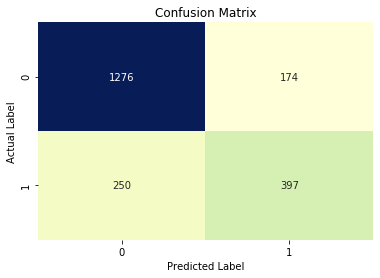

In [245]:
sns.heatmap(rf_conf_train,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [246]:
print(metrics.classification_report(Y_train,y_train_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1450
           1       0.70      0.61      0.65       647

    accuracy                           0.80      2097
   macro avg       0.77      0.75      0.75      2097
weighted avg       0.79      0.80      0.79      2097



# TEST

In [247]:
rf_conf_test=metrics.confusion_matrix(Y_test,y_test_predict_rf)
print(rf_conf_test)

[[536  87]
 [128 149]]


In [248]:
tn, fp, fn, tp = rf_conf_test.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

True Negative: 536 
False Positives: 87 
False Negatives: 128 
True Positives: 149 



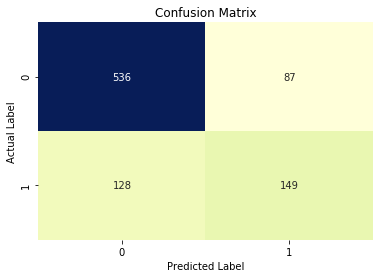

In [249]:
sns.heatmap(rf_conf_test,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [250]:
print(metrics.classification_report(Y_test,y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       623
           1       0.63      0.54      0.58       277

    accuracy                           0.76       900
   macro avg       0.72      0.70      0.71       900
weighted avg       0.75      0.76      0.76       900



# ROC CURVE & AUC for RF train and test set

# TRAIN

AUC: 0.840


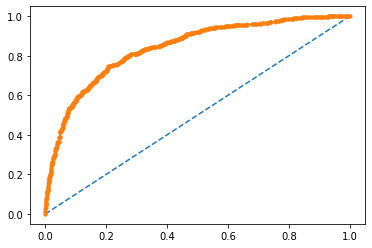

In [251]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_rf_train = metrics.roc_auc_score(Y_train,y_train_predict_prob_rf[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_rf_train)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_rf_train, tpr_rf_train, thresholds_rf_train = metrics.roc_curve(Y_train,y_train_predict_prob_rf[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rf_train, tpr_rf_train, marker='.')
# show the plot
plt.show()

# TEST

AUC: 0.808


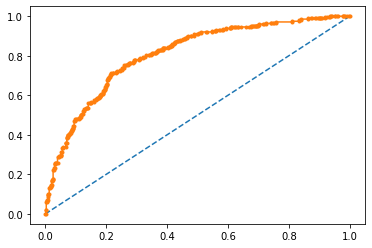

In [252]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_rf_test = metrics.roc_auc_score(Y_test,y_test_predict_prob_rf[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_rf_test)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_rf_test, tpr_rf_test, thresholds_rf_test = metrics.roc_curve(Y_test,y_test_predict_prob_rf[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rf_test, tpr_rf_test, marker='.')
# show the plot
plt.show()

# <font color='Blue'> ANN Model </font>

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
ss = StandardScaler()

In [255]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,-0.975285,1.003723,-0.248805,1.756428,-0.665003,2.245713,-0.900489,-0.295113,-0.794127,0.794127,-0.122494,0.122494,-0.515306,-0.535260,1.277152,-0.196553,-0.420437,-2.146381,-0.337118,3.479404
1,0.752300,1.828722,2.012447,2.602261,1.503754,-0.445293,-0.900489,-0.295113,1.259244,-1.259244,-0.122494,0.122494,-0.515306,-0.535260,-0.782992,-0.196553,2.378475,0.465900,-0.337118,-0.287406
2,1.328162,-0.141664,-0.461871,-0.404311,-0.665003,-0.445293,-0.900489,3.388531,1.259244,-1.259244,-0.122494,0.122494,1.940595,-0.535260,-0.782992,-0.196553,-0.420437,0.465900,-0.337118,-0.287406
3,-0.207470,-0.582198,-0.351902,-0.335933,-0.665003,-0.445293,1.110507,-0.295113,-0.794127,0.794127,-0.122494,0.122494,-0.515306,1.868252,-0.782992,-0.196553,-0.420437,0.465900,-0.337118,-0.287406
4,-0.207470,-0.582198,-0.324409,-0.623120,-0.665003,-0.445293,1.110507,-0.295113,-0.794127,0.794127,-0.122494,0.122494,-0.515306,1.868252,-0.782992,-0.196553,-0.420437,0.465900,-0.337118,-0.287406


In [256]:
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,0.385251,-0.216393,-0.566958,-0.509961,-0.67028,-0.40161,-0.948016,3.443420,1.256502,-1.256502,-0.130189,0.130189,1.823985,-0.553390,-0.775515,-0.188873,-0.377004,0.466757,-0.365378,-0.255125
1,1.237390,-0.039135,-0.537690,-0.544062,-0.67028,2.48998,-0.948016,-0.290409,-0.795860,0.795860,-0.130189,0.130189,-0.548250,-0.553390,1.289466,-0.188873,-0.377004,0.466757,-0.365378,-0.255125
2,-0.182842,-0.542920,0.272064,-0.540962,-0.67028,-0.40161,1.054835,-0.290409,-0.795860,0.795860,-0.130189,0.130189,-0.548250,-0.553390,1.289466,-0.188873,-0.377004,0.466757,-0.365378,-0.255125
3,0.763979,-0.216393,-0.040130,-0.509961,-0.67028,-0.40161,-0.948016,3.443420,1.256502,-1.256502,-0.130189,0.130189,1.823985,-0.553390,-0.775515,-0.188873,-0.377004,-2.142443,2.736890,-0.255125
4,-0.182842,-0.542920,1.189135,-0.230950,-0.67028,-0.40161,1.054835,-0.290409,-0.795860,0.795860,-0.130189,0.130189,-0.548250,1.807043,-0.775515,-0.188873,-0.377004,-2.142443,2.736890,-0.255125


In [257]:
from sklearn.neural_network import MLPClassifier

In [258]:
nncl = MLPClassifier(hidden_layer_sizes=10
                     ,max_iter=5000
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.0001,
                     learning_rate='constant',
                     learning_rate_init=0.001
)

In [259]:
nncl.fit(X_train_scaled,Y_train)

Iteration 1, loss = 0.72755768
Iteration 2, loss = 0.69445113
Iteration 3, loss = 0.65705933
Iteration 4, loss = 0.62411160
Iteration 5, loss = 0.59986207
Iteration 6, loss = 0.58120001
Iteration 7, loss = 0.56875006
Iteration 8, loss = 0.55961020
Iteration 9, loss = 0.55210907
Iteration 10, loss = 0.54638287
Iteration 11, loss = 0.54128384
Iteration 12, loss = 0.53732159
Iteration 13, loss = 0.53350159
Iteration 14, loss = 0.53038400
Iteration 15, loss = 0.52742714
Iteration 16, loss = 0.52469673
Iteration 17, loss = 0.52217081
Iteration 18, loss = 0.51982202
Iteration 19, loss = 0.51755973
Iteration 20, loss = 0.51557383
Iteration 21, loss = 0.51359023
Iteration 22, loss = 0.51168831
Iteration 23, loss = 0.50997381
Iteration 24, loss = 0.50833722
Iteration 25, loss = 0.50683286
Iteration 26, loss = 0.50540982
Iteration 27, loss = 0.50402180
Iteration 28, loss = 0.50263907
Iteration 29, loss = 0.50141306
Iteration 30, loss = 0.50017954
Iteration 31, loss = 0.49897494
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [260]:
#This code snippet is for predicting the classes.

y_train_predict_ann = nncl.predict(X_train_scaled)
y_test_predict_ann = nncl.predict(X_test_scaled)

In [261]:
y_train_predict_prob_ann = nncl.predict_proba(X_train_scaled)
y_test_predict_prob_ann = nncl.predict_proba(X_test_scaled)

In [262]:
ann_conf_train_beforeGrid=metrics.confusion_matrix(Y_train,y_train_predict_ann)
print(ann_conf_train_beforeGrid)

[[1252  198]
 [ 252  395]]


In [263]:
tn, fp, fn, tp = ann_conf_train_beforeGrid.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
print(metrics.classification_report(Y_train,y_train_predict_ann))

True Negative: 1252 
False Positives: 198 
False Negatives: 252 
True Positives: 395
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1450
           1       0.67      0.61      0.64       647

    accuracy                           0.79      2097
   macro avg       0.75      0.74      0.74      2097
weighted avg       0.78      0.79      0.78      2097



In [264]:
ann_conf_test_beforeGrid=metrics.confusion_matrix(Y_test,y_test_predict_ann)
print(ann_conf_test_beforeGrid)

[[523 100]
 [125 152]]


In [265]:
tn, fp, fn, tp = ann_conf_test_beforeGrid.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
print(metrics.classification_report(Y_train,y_train_predict_ann))

True Negative: 523 
False Positives: 100 
False Negatives: 125 
True Positives: 152
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1450
           1       0.67      0.61      0.64       647

    accuracy                           0.79      2097
   macro avg       0.75      0.74      0.74      2097
weighted avg       0.78      0.79      0.78      2097



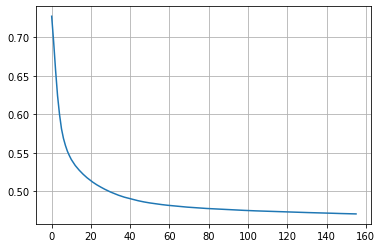

In [266]:
plt.plot(nncl.loss_curve_)
plt.grid();

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
param_grid = {
   'hidden_layer_sizes': [10,100,1000],
  'activation': ['logistic', 'tanh', 'relu'],
 'learning_rate': ['adaptive','constant'],
'tol': [0.01,0.001,0.0001]
}

In [269]:
nncl = MLPClassifier(random_state=1,max_iter=5000,solver='sgd',verbose=True)

In [270]:
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid,n_jobs=-1)

In [271]:
grid_search.fit(X_train, Y_train)

Iteration 1, loss = 0.59682966
Iteration 2, loss = 0.57514556
Iteration 3, loss = 0.56070995
Iteration 4, loss = 0.55179467
Iteration 5, loss = 0.54529550
Iteration 6, loss = 0.54017646
Iteration 7, loss = 0.53585364
Iteration 8, loss = 0.53335196
Iteration 9, loss = 0.52964371
Iteration 10, loss = 0.52697892
Iteration 11, loss = 0.52447011
Iteration 12, loss = 0.52211104
Iteration 13, loss = 0.52000504
Iteration 14, loss = 0.51840538
Iteration 15, loss = 0.51670858
Iteration 16, loss = 0.51505346
Iteration 17, loss = 0.51353461
Iteration 18, loss = 0.51292784
Iteration 19, loss = 0.51086371
Iteration 20, loss = 0.50912343
Iteration 21, loss = 0.50841849
Iteration 22, loss = 0.50695713
Iteration 23, loss = 0.50600278
Iteration 24, loss = 0.50506656
Iteration 25, loss = 0.50447513
Iteration 26, loss = 0.50404590
Iteration 27, loss = 0.50287173
Iteration 28, loss = 0.50231967
Iteration 29, loss = 0.50161031
Iteration 30, loss = 0.50118884
Iteration 31, loss = 0.50009864
Iteration 32, los

Iteration 257, loss = 0.45305443
Iteration 258, loss = 0.45171164
Iteration 259, loss = 0.45321014
Iteration 260, loss = 0.45195290
Iteration 261, loss = 0.45164047
Iteration 262, loss = 0.45208238
Iteration 263, loss = 0.45191159
Iteration 264, loss = 0.45183245
Iteration 265, loss = 0.45154895
Iteration 266, loss = 0.45152779
Iteration 267, loss = 0.45172556
Iteration 268, loss = 0.45093766
Iteration 269, loss = 0.45149905
Iteration 270, loss = 0.45109594
Iteration 271, loss = 0.45057920
Iteration 272, loss = 0.45119796
Iteration 273, loss = 0.45149089
Iteration 274, loss = 0.45139672
Iteration 275, loss = 0.45081730
Iteration 276, loss = 0.45070681
Iteration 277, loss = 0.45100997
Iteration 278, loss = 0.45047106
Iteration 279, loss = 0.45026079
Iteration 280, loss = 0.45059705
Iteration 281, loss = 0.44995395
Iteration 282, loss = 0.44986446
Iteration 283, loss = 0.45054092
Iteration 284, loss = 0.45070238
Iteration 285, loss = 0.45051722
Iteration 286, loss = 0.44969862
Iteration 

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=5000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...e=True, solver='sgd',
                                     tol=0.0001, validation_fraction=0.1,
                                     verbose=True, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
      

In [272]:
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'tol': 0.0001}

In [273]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [274]:
best_model_ann = grid_search.best_estimator_

In [275]:
y_train_predict_ann = best_model_ann.predict(X_train_scaled)
y_test_predict_ann = best_model_ann.predict(X_test_scaled)

In [276]:
y_train_predict_prob_ann = best_model_ann.predict_proba(X_train_scaled)
y_test_predict_prob_ann = best_model_ann.predict_proba(X_test_scaled)

# Model Evaluation of the ANN - Train and Test Sets

# TRAIN

In [277]:
ann_conf_train=metrics.confusion_matrix(Y_train,y_train_predict_ann)
print(ann_conf_train)

[[881 569]
 [147 500]]


In [278]:
tn, fp, fn, tp = ann_conf_train.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 881 
False Positives: 569 
False Negatives: 147 
True Positives: 500


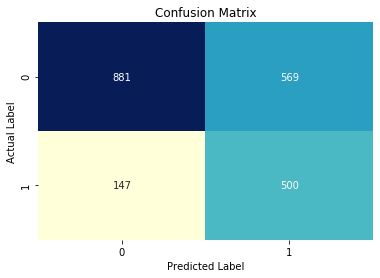

In [279]:
sns.heatmap(ann_conf_train,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [280]:
print(metrics.classification_report(Y_train,y_train_predict_ann))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71      1450
           1       0.47      0.77      0.58       647

    accuracy                           0.66      2097
   macro avg       0.66      0.69      0.65      2097
weighted avg       0.74      0.66      0.67      2097



AUC: 0.767


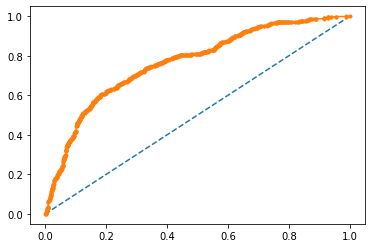

In [281]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_ann_train = metrics.roc_auc_score(Y_train,y_train_predict_prob_ann[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_ann_train)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_ann_train, tpr_ann_train, thresholds_ann_train = metrics.roc_curve(Y_train,y_train_predict_prob_ann[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann_train, tpr_ann_train, marker='.')
# show the plot
plt.show()

# TEST

In [282]:
ann_conf_test =metrics.confusion_matrix(Y_test,y_test_predict_ann)
print(ann_conf_test,'\n')

tn, fp, fn, tp = ann_conf_test.ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,y_test_predict_ann))

[[371 252]
 [ 73 204]] 

True Negative: 371 
False Positives: 252 
False Negatives: 73 
True Positives: 204 

              precision    recall  f1-score   support

           0       0.84      0.60      0.70       623
           1       0.45      0.74      0.56       277

    accuracy                           0.64       900
   macro avg       0.64      0.67      0.63       900
weighted avg       0.72      0.64      0.65       900



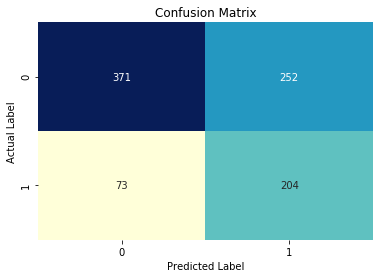

In [283]:
sns.heatmap(ann_conf_test,annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.731


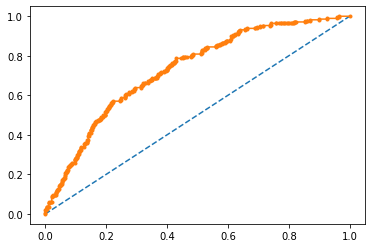

In [284]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc_ann_test = metrics.roc_auc_score(Y_test,y_test_predict_prob_ann[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc_ann_test)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_ann_test, tpr_ann_test, thresholds_ann_test = metrics.roc_curve(Y_test,y_test_predict_prob_ann[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann_test, tpr_ann_test, marker='.')
# show the plot
plt.show()

---

---

# <font color='Red'> Comparing all three models to find best model: </font>

## Compairing all 3 models score

In [288]:
index=['Accuracy']
#index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'CART Train':[best_model_cart.score(X_train, Y_train)],
                      'CART Test':[best_model_cart.score(X_test, Y_test)],
                     'RF Train':[best_model_rf.score(X_train, Y_train)],
                      'RF Test':[best_model_rf.score(X_test, Y_test)],
                     'ANN Train':[best_model_ann.score(X_train_scaled, Y_train)],
                      'ANN Test':[best_model_ann.score(X_test, Y_test)]},index=index)
round(data,2)

,CART Train,CART Test,RF Train,RF Test,ANN Train,ANN Test
Accuracy,0.8,0.77,0.8,0.76,0.66,0.77


## Compairing all 3 model confusion matrix for Train data

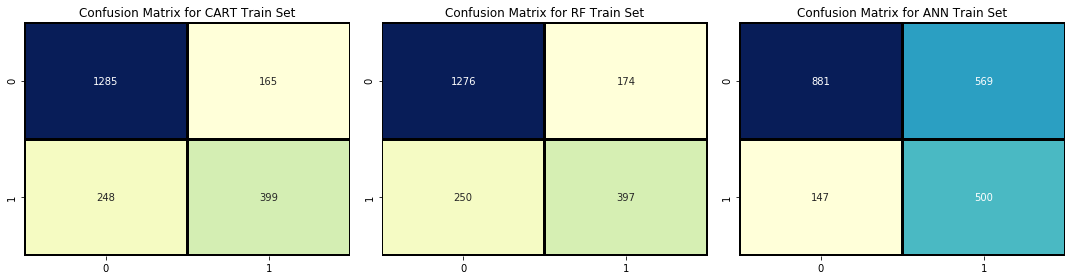

In [289]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax1=sns.heatmap(cart_conf_train,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax1.title.set_text('Confusion Matrix for CART Train Set')

ax2=sns.heatmap(rf_conf_train,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax2.title.set_text('Confusion Matrix for RF Train Set')

ax3=sns.heatmap(ann_conf_train,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax3.title.set_text('Confusion Matrix for ANN Train Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

## Compairing all 3 model confusion matrix for Test data

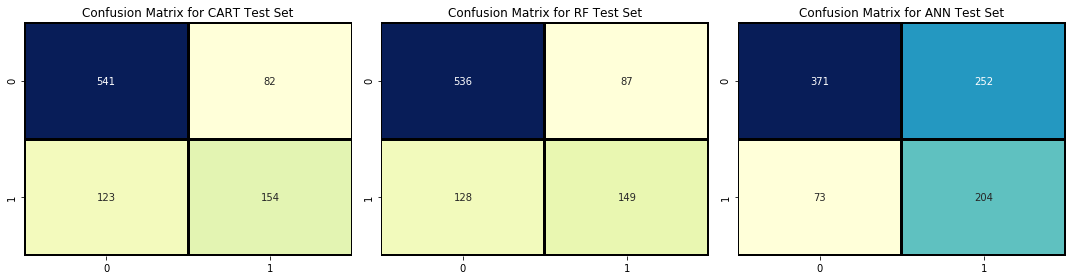

In [290]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax1=sns.heatmap(cart_conf_test,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax1.title.set_text('Confusion Matrix for CART Test Set')

ax2=sns.heatmap(rf_conf_test,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax2.title.set_text('Confusion Matrix for RF Test Set')

ax3=sns.heatmap(ann_conf_test,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax3.title.set_text('Confusion Matrix for ANN Test Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

## Compairing all 3 model ROC AUC graphs for Train data

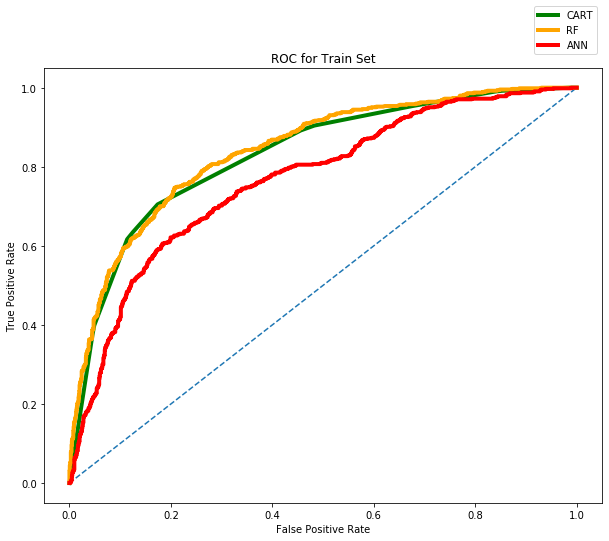

In [291]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_cart_train, tpr_cart_train,color='Green',label="CART", linewidth='4')
plt.plot(fpr_rf_train,tpr_rf_train,color='Orange',label="RF", linewidth='4')
plt.plot(fpr_ann_train,tpr_ann_train,color='Red',label="ANN", linewidth='4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Train Set')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

In [292]:
## Compairing all 3 model ROC AUC graphs for Test data

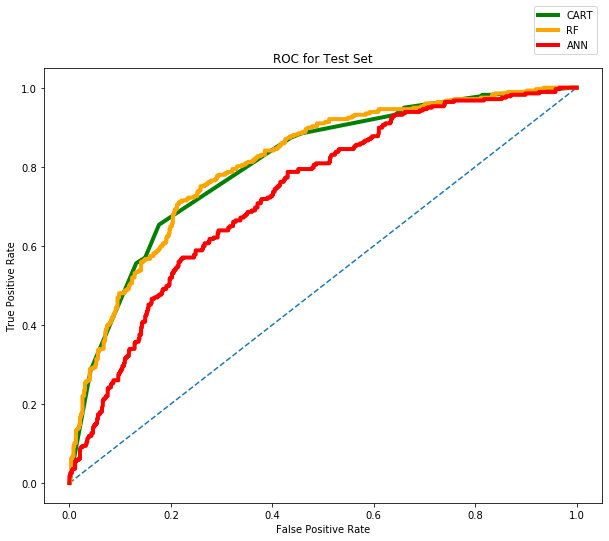

In [293]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_cart_test, tpr_cart_test,color='Green',label="CART", linewidth='4')
plt.plot(fpr_rf_test,tpr_rf_test,color='Orange',label="RF", linewidth='4')
plt.plot(fpr_ann_test,tpr_ann_test,color='Red',label="ANN", linewidth='4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test Set')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

## <font size=4> <font color = blue> Based all above graphs and classification report, we found <font color = red>CART</font> model is best model as it has overall good accuracy (0.80) and healthy Recall value (0.62) and good AUC/ROC value (0.830).

# <font size=6> <font color = darkblue> ~~ Compariring all three models by applying custom probability:

## Custom Probability for CART Model:

In [305]:
for j in np.arange(0.1,0.9,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train_cart=[]#defining an empty list
    for i in range(0,len(Y_train_predict_prob_cart[:,1])):#defining a loop
        if Y_train_predict_prob_cart[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train_cart.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.recall_score(Y_train,custom_cutoff_train_cart))

0.1 0.9505409582689336
0.2 0.8918083462132921
0.3 0.7047913446676971
0.4 0.6352395672333848
0.5 0.616692426584235
0.6 0.3987635239567233
0.7 0.3987635239567233
0.8 0.0


In [306]:
custom_prob = 0.35 #defining the cut-off value of our choice
custom_cutoff_train_cart=[]#defining an empty list
for i in range(0,len(Y_train_predict_prob_cart[:,1])):#defining a loop
    if Y_train_predict_prob_cart[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train_cart.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[1198  252]
 [ 191  456]] 

True Negative: 1198 
False Positives: 252 
False Negatives: 191 
True Positives: 456 

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1450
           1       0.64      0.70      0.67       647

    accuracy                           0.79      2097
   macro avg       0.75      0.77      0.76      2097
weighted avg       0.80      0.79      0.79      2097



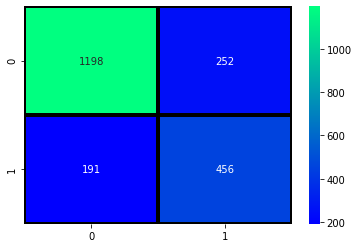

In [307]:
print(metrics.confusion_matrix(Y_train,custom_cutoff_train_cart),'\n')
sns.heatmap((metrics.confusion_matrix(Y_train,custom_cutoff_train_cart)),annot=True,fmt='.5g',cmap='winter', linewidth='3',linecolor='black');
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,custom_cutoff_train_cart).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_train,custom_cutoff_train_cart))

---

## Custom Probability for RF Model:

In [308]:
for j in np.arange(0.1,0.9,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train_rf=[]#defining an empty list
    for i in range(0,len(y_train_predict_prob_rf[:,1])):#defining a loop
        if y_train_predict_prob_rf[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train_rf.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.recall_score(Y_train,custom_cutoff_train_rf))

0.1 0.9690880989180835
0.2 0.8624420401854714
0.3 0.7156105100463679
0.4 0.6367851622874807
0.5 0.6136012364760433
0.6 0.4234930448222566
0.7 0.2302936630602782
0.8 0.12828438948995363


In [309]:
custom_prob = 0.35 #defining the cut-off value of our choice
custom_cutoff_train_rf=[]#defining an empty list
for i in range(0,len(y_train_predict_prob_rf[:,1])):#defining a loop
    if y_train_predict_prob_rf[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train_rf.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[1221  229]
 [ 216  431]] 

True Negative: 1221 
False Positives: 229 
False Negatives: 216 
True Positives: 431 

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1450
           1       0.65      0.67      0.66       647

    accuracy                           0.79      2097
   macro avg       0.75      0.75      0.75      2097
weighted avg       0.79      0.79      0.79      2097



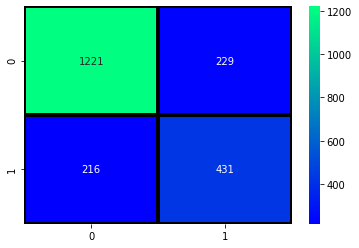

In [310]:
print(metrics.confusion_matrix(Y_train,custom_cutoff_train_rf),'\n')
sns.heatmap((metrics.confusion_matrix(Y_train,custom_cutoff_train_rf)),annot=True,fmt='.5g',cmap='winter', linewidth='3',linecolor='black');
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,custom_cutoff_train_rf).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_train,custom_cutoff_train_rf))

---

## Custom Probability for ANN Model:

In [311]:
for j in np.arange(0.1,0.9,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train_ann=[]#defining an empty list
    for i in range(0,len(y_train_predict_prob_ann[:,1])):#defining a loop
        if y_train_predict_prob_ann[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train_ann.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.recall_score(Y_train,custom_cutoff_train_ann))

0.1 1.0
0.2 0.9984544049459042
0.3 0.9505409582689336
0.4 0.9180834621329211
0.5 0.7727975270479135
0.6 0.7001545595054096
0.7 0.5935085007727975
0.8 0.43894899536321486


In [312]:
custom_prob = 0.35 #defining the cut-off value of our choice
custom_cutoff_train_ann=[]#defining an empty list
for i in range(0,len(y_train_predict_prob_ann[:,1])):#defining a loop
    if y_train_predict_prob_ann[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train_ann.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[455 995]
 [ 40 607]] 

True Negative: 455 
False Positives: 995 
False Negatives: 40 
True Positives: 607 

              precision    recall  f1-score   support

           0       0.92      0.31      0.47      1450
           1       0.38      0.94      0.54       647

    accuracy                           0.51      2097
   macro avg       0.65      0.63      0.50      2097
weighted avg       0.75      0.51      0.49      2097



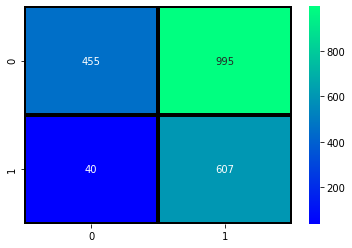

In [313]:
print(metrics.confusion_matrix(Y_train,custom_cutoff_train_ann),'\n')
sns.heatmap((metrics.confusion_matrix(Y_train,custom_cutoff_train_ann)),annot=True,fmt='.5g',cmap='winter', linewidth='3',linecolor='black');
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,custom_cutoff_train_ann).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_train,custom_cutoff_train_ann))

---